In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

In [2]:
X , y = make_regression(n_samples= 10000, n_features= 20 , n_informative= 20 , noise = 10 , random_state= 1)

# normalisation
u = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
X = (X-u)/std



In [3]:
# add a column of 1s for vectorization
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)
print(y.shape)



(10000, 21)
(10000,)


In [20]:
def hypothesis(X,theta):
    return np.dot(X,theta)


#loss fuction 
def loss(X, y, theta):
    
    m = X.shape[0]
    l = 0.0
    y_ = hypothesis(X, theta)
    l = np.sum((y - y_)**2)
        
    return l/m

# calculate the gradient
def gradient(X,y,theta):
    y_ = hypothesis(X , theta)
    grad = np.dot(X.T, (y_ - y))
    m = X.shape[0]
    return grad/m


#mini batch gradient descent
def mini_batch_gd(X, y ,batch_size = 200,  learning_rate = 0.01, max_iters = 10):
    
    n = X.shape[1]
    theta = np.zeros((n,)) 
    loss_list = []
    
    data = np.hstack((X, y.reshape(-1,1)))
    
    for i in range(max_iters):
        
       
        
        #mini batch gradient descent
        np.random.shuffle(data)
        m = data.shape[0]
        total_batches = int(m/batch_size)
        
        for i in range(total_batches):
            batch_data = data[i*batch_size: (i + 1)*batch_size,:]
            
            x_batch = batch_data[:,:-1]
            y_batch = batch_data[:,-1]
            
            batch_gradient = gradient(x_batch, y_batch, theta)
            theta = theta - learning_rate*batch_gradient
            l= loss(x_batch,y_batch,theta)
            loss_list.append(l)
            
    return theta , loss_list


# batch gradient descent
def gradient_descent(X, y, learning_rate = 0.01, max_epochs = 300):
    n = X.shape[1]
    theta = np.zeros((n,))
    loss_list = []
    
    for i in range(max_epochs):
        
        l = loss(X, y , theta)
        loss_list.append(l)
        
        grad = gradient(X, y, theta)
        theta = theta - learning_rate*grad    
        
    return theta, loss_list
    
    
        
    

In [17]:
# mini gradient descent

theta , loss_list = mini_batch_gd(X , y)


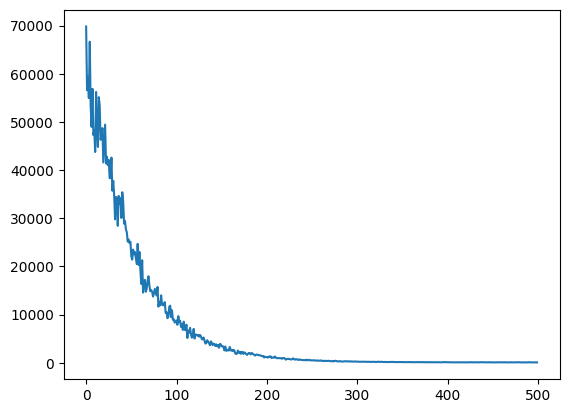

In [18]:
# curve is noisy and the conversion is fast (in 10 epochs)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.show()

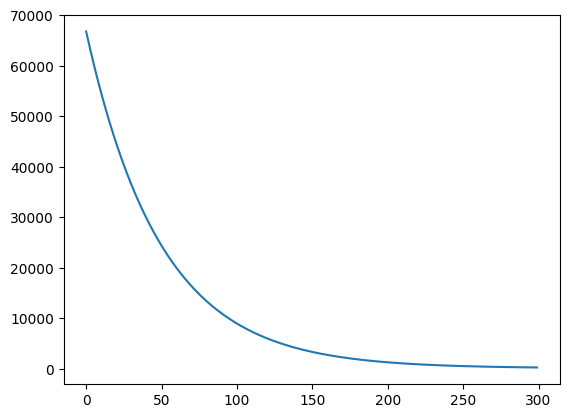

In [21]:
# here the conversion is slow and not noisy( it's in 300 epochs)
theta , loss_list = gradient_descent(X,y)
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.show()

# Mini batch advantages 
- Faster convergence
- noisy update helps to avoid local minima(more robust convergence)
- vectorization can be used but not in stochestic gd
- no need to load entire data into memory

# stochestic
- only one example is taken while tunning parameters 
- faseter convergence
- vecotrization cannot be used

